# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

***Drive Mount***


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Import Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


# Load Data 

In [3]:
car_price=pd.read_csv("/content/drive/MyDrive/deep learning assignment/CarPrice_Assignment.csv")

In [4]:
car_price.head(6)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [5]:
car_price.shape

(205, 26)

In [6]:
car_price.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Convert values in numeric form

In [9]:
car_price.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
car_price['fueltype'] = labelencoder.fit_transform(car_price['fueltype'])
car_price['aspiration'] = labelencoder.fit_transform(car_price['aspiration'])
car_price['carbody'] = labelencoder.fit_transform(car_price['carbody'])
car_price['drivewheel'] = labelencoder.fit_transform(car_price['drivewheel'])
car_price['enginelocation'] = labelencoder.fit_transform(car_price['enginelocation'])
car_price['fuelsystem'] = labelencoder.fit_transform(car_price['enginelocation'])
car_price['doornumber'] = car_price['doornumber'].map({'two':2,'four':4})

In [11]:
car_price.head(6)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,ohc,five,136,0,3.19,3.40,8.5,110,5500,19,25,15250.0


In [12]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#  check missing values


In [13]:
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Correlation
*key problems*


In [14]:
corr_relat = car_price.corr()
corr_relat["price"].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
enginelocation      0.324973
fuelsystem          0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
carbody            -0.083976
peakrpm            -0.085267
fueltype           -0.105679
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

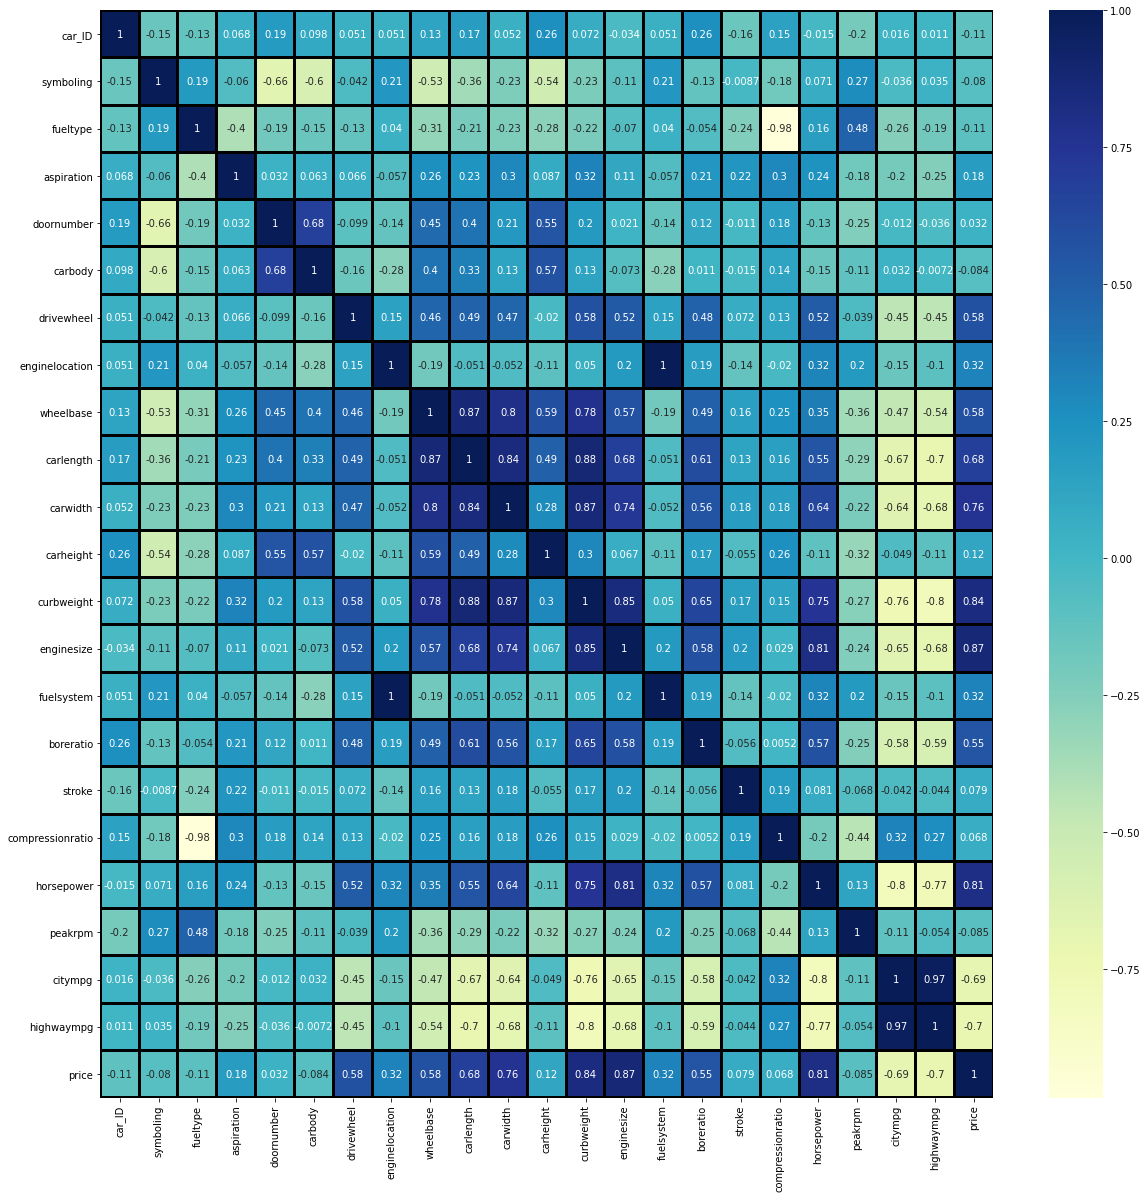

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(car_price.corr(), cmap="YlGnBu", annot=True, linewidths=2, linecolor='black')

In [16]:
fin_data= car_price[['price', 'horsepower','carlength', 'carwidth','enginesize','enginelocation',
                'drivewheel','wheelbase',  'boreratio', 'curbweight']]

In [17]:
fin_data.head(6)

,price,horsepower,carlength,carwidth,enginesize,enginelocation,drivewheel,wheelbase,boreratio,curbweight
0,13495.0,111,168.8,64.1,130,0,2,88.6,3.47,2548
1,16500.0,111,168.8,64.1,130,0,2,88.6,3.47,2548
2,16500.0,154,171.2,65.5,152,0,2,94.5,2.68,2823
3,13950.0,102,176.6,66.2,109,0,1,99.8,3.19,2337
4,17450.0,115,176.6,66.4,136,0,0,99.4,3.19,2824
5,15250.0,110,177.3,66.3,136,0,1,99.8,3.19,2507


 #  Split Data

In [18]:
car_price.iloc[:,:-1]
car_price.iloc[:,-1]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [19]:
#normalized
mean = fin_data.mean(axis=0)
fin_data-= mean
std = fin_data.std(axis=0)
fin_data/= std

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = (fin_data.loc[:, fin_data.columns != 'price'])
y = (fin_data.loc[:, fin_data.columns == 'price'])

In [22]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=34)
print(y_train)
print(x_train)

        price
69   1.865010
64  -0.254318
32  -0.986088
183 -0.663639
75   0.403849
..        ...
68   1.874023
85  -0.787061
105  0.803906
122 -0.709452
161 -0.615697

[143 rows x 1 columns]
     horsepower  carlength  carwidth  ...  wheelbase  boreratio  curbweight
69     0.477515   1.090250  2.047449  ...   1.319115   0.923942    1.804244
64    -0.508724   0.304016  0.276055  ...   0.007210   0.222431   -0.250760
32    -1.115640  -1.949316 -0.889335  ...  -0.839717  -1.549809   -1.380052
183   -0.483436  -0.190420 -0.190101  ...  -0.241886  -0.516003   -0.665602
75     1.792500   0.352649  0.975290  ...   0.654859   1.662375    0.680714
..          ...        ...       ...  ...        ...        ...         ...
68     0.477515   1.365838  2.047449  ...   1.867126   0.923942    2.293988
85    -0.407571  -0.133682 -0.236716  ...  -0.407950   0.074744   -0.365994
105    2.424705  -0.271475  0.928674  ...  -1.238270   0.370117    1.120523
122   -0.913335  -0.547063 -0.982566  ...  -0.83

 # Model 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers

In [24]:
network = models.Sequential()
network.add(layers.Dense (10, activation='relu',input_shape =(9,)))
network.add(layers.Dense(8,activation='relu'))
network.add(layers.Dense(6,activation='tanh'))

# Compile

In [25]:
network.compile(optimizer='rmsprop',
                loss='mse',
                metrics= 'mae')

In [26]:
t1=x_train.astype('float32')
t2=x_test.astype('float32')

**train with Epochs**

In [27]:
network.fit(x_train, y_train,epochs=100, batch_size=20,verbose = 1, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 92ms/step - loss: 1.2776 - mae: 0.7971 - val_loss: 0.9191 - val_mae: 0.7523
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0375 - mae: 0.7463 - val_loss: 0.8915 - val_mae: 0.7386
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 1.4494 - mae: 0.8433 - val_loss: 0.8696 - val_mae: 0.7273
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0300 - mae: 0.7285 - val_loss: 0.8487 - val_mae: 0.7179
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9852 - mae: 0.7128 - val_loss: 0.8284 - val_mae: 0.7086
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9678 - mae: 0.7130 - val_loss: 0.8080 - val_mae: 0.6992
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8692 - mae: 0.6748 - val_loss: 0.7891 - val_mae: 0.6894
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8133 - mae: 0.6764 - va

# Evaluation

In [28]:
network.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.2748 - mae: 0.3217


[0.2748044431209564, 0.32167720794677734]

***prediction***

In [29]:
prediction = network.predict(x_test)

In [30]:
len(x) == len(y)

True

In [31]:
network.predict(x_test).sum()

-58.037674

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')

86.48698090966754 %
